<div style="background-color: #b0c4de; padding: 10px; border-radius: 5px; text-align: center;">
    <h1 style="color: #ffffff; margin: 0;">Battery Failure Prediction Project</h1>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; border: 2px solid #4682b4;">
<h1 style="color: #4682b4; text-align: center;"> Project Overview</h1>

<p style="color: #333; font-size: 16px;">This project aims to predict battery failure using a dataset from NASA, leveraging machine learning models and an ensemble approach. The workflow is summarized below:</p>

<ul>
    <li><b style="color: #ff4500;">Data Cleaning</b>:
        <ul>
            <li style="color: #2f4f4f;">Loaded the raw NASA battery dataset.</li>
            <li style="color: #2f4f4f;">Handled missing values by imputing with <span style="color: #228b22;">median values</span> for numerical columns to maintain data integrity.</li>
            <li style="color: #2f4f4f;">Removed outliers using the <span style="color: #228b22;">Interquartile Range (IQR)</span> method to reduce noise.</li>
            <li style="color: #2f4f4f;">Normalized time-series data to ensure consistency across battery cycles.</li>
        </ul>
    </li>
    <li><b style="color: #ff4500;">Feature Selection</b>:
        <ul>
            <li style="color: #2f4f4f;">Selected key features: <span style="color: #228b22;">cycle, voltage, current, temperature, capacity, time, internal_resistance</span>.</li>
            <li style="color: #2f4f4f;">Engineered features like cycle-based trends and internal resistance changes to capture degradation.</li>
            <li style="color: #2f4f4f;">Applied <span style="color: #228b22;">MinMaxScaler</span> to scale features for model compatibility.</li>
        </ul>
    </li>
    <li><b style="color: #ff4500;">Model Ensemble</b>:
        <ul>
            <li style="color: #2f4f4f;"><b style="color: #4682b4;">XGBoost</b>: Trained a classifier, tuned with grid search (e.g., learning rate, max depth).</li>
            <li style="color: #2f4f4f;"><b style="color: #4682b4;">One-Class SVM</b>: Used for anomaly detection to identify failure outliers.</li>
            <li style="color: #2f4f4f;"><b style="color: #4682b4;">LSTM</b>: Modeled temporal patterns in battery cycles with a sequential network.</li>
            <li style="color: #2f4f4f;"><b style="color: #4682b4;">Ensemble</b>: Combined predictions (50% LSTM, 30% XGBoost, 20% One-Class SVM) for improved accuracy.</li>
            <li style="color: #2f4f4f;">Saved models as <span style="color: #228b22;">xgboost_model_tuned.json</span>, <span style="color: #228b22;">one_class_svm_model_tuned.joblib</span>, and <span style="color: #228b22;">lstm_model_tuned.h5</span>.</li>
        </ul>
    </li>
</ul>

<p style="color: #333; font-size: 16px;">The ensemble predictions are served via a <b style="color: #4682b4;">Flask API</b> at the <span style="color: #228b22;">/predict</span> endpoint and visualized in a <b style="color: #4682b4;">Power BI dashboard</b> for actionable insights.</p>
</div>

📚 <h2>Library Descriptions</h2>
====================================================

<h3>🔧 Data Handling & Preprocessing</h3>
<ul>
  <li><code>pandas</code>: Used for loading, manipulating, and analyzing tabular data (DataFrames).</li>
  <li><code>numpy</code>: Supports numerical operations on arrays and matrices.</li>
  <li><code>scipy.io, interpolate</code>: Handles MATLAB file formats and interpolation for missing data.</li>
  <li><code>os</code>: Interacts with the operating system (e.g., file and folder operations).</li>
  <li><code>warnings</code>: Used to suppress warning messages for cleaner outputs.</li>
</ul>

<h3>📊 Data Visualization</h3>
<ul>
  <li><code>matplotlib.pyplot</code>: Core library for plotting basic graphs like line plots, histograms, etc.</li>
  <li><code>seaborn</code>: Built on matplotlib; used for advanced statistical plots and beautiful visualizations.</li>
</ul>

<h3>⚙️ Machine Learning</h3>
<ul>
  <li><code>sklearn.model_selection</code>: Tools for splitting datasets and performing cross-validation.</li>
  <li><code>sklearn.ensemble.RandomForestClassifier</code>: Ensemble method using multiple decision trees.</li>
  <li><code>sklearn.svm.OneClassSVM</code>: Anomaly detection model used for outlier detection.</li>
  <li><code>sklearn.metrics</code>: Evaluates model performance with metrics like accuracy, precision, recall, F1, ROC-AUC.</li>
  <li><code>sklearn.preprocessing</code>: Preprocessing tools like <code>StandardScaler</code>, <code>MinMaxScaler</code>, and <code>LabelEncoder</code>.</li>
  <li><code>joblib</code>: Efficiently saves and loads ML models.</li>
  <li><code>xgboost.XGBClassifier</code>: Gradient boosting algorithm optimized for speed and performance.</li>
</ul>

<h3>🧠 Deep Learning (LSTM)</h3>
<ul>
  <li><code>tensorflow.keras.models.Sequential</code>: Builds LSTM models in a layer-by-layer fashion.</li>
  <li><code>tensorflow.keras.layers</code>: Adds LSTM, Dense (fully connected), and Dropout layers.</li>
  <li><code>tensorflow.keras.callbacks.EarlyStopping</code>: Stops training early if the model stops improving.</li>
</ul>

<h3>⚖️ Imbalanced Data Handling</h3>
<ul>
  <li><code>imblearn.over_sampling.SMOTE</code>: Balances datasets by synthetically generating samples for minority class.</li>
  <li><code>imblearn.pipeline.Pipeline</code>: Chains together preprocessing and modeling steps including SMOTE.</li>
</ul>

-->

In [16]:
# Core Libraries
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore")

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, make_scorer

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import OneClassSVM

# Deep Learning (LSTM)
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Other Utilities
import joblib
import scipy.io
from scipy import interpolate

<h2>🔧 Overview</h2>
<p>This Python script processes <strong>NASA battery dataset</strong> files (MATLAB format) to extract and compute features cycle-wise for <code>B0005.mat</code>, <code>B0055.mat</code>, and <code>B0056.mat</code>. It combines the extracted data into a CSV file for battery failure prediction tasks.</p>

<h2>📁 File Handling</h2>
<ul>
  <li>Defines <code>data_dir</code> (input path) and <code>output_dir</code> (output path).</li>
  <li>Creates <code>output_dir</code> if it doesn’t exist.</li>
  <li>Iterates through selected battery files.</li>
</ul>

<h2>🔍 Feature Extraction per Discharge Cycle</h2>
<ul>
  <li>Filters only <strong>discharge</strong> cycles from the 'cycle' struct.</li>
  <li>Extracts sensor data: Voltage, Current, Temperature, Time, and Capacity.</li>
  <li>Computes cycle-level features:
    <ul>
      <li><code>voltage</code>, <code>current</code>, <code>temperature</code> – Mean values</li>
      <li><code>capacity</code> – From dataset</li>
      <li><code>time</code> – Duration of cycle</li>
      <li><code>internal_resistance</code> – Based on voltage drop & discharge current</li>
      <li><code>SOC</code> – Based on voltage (scaled between 3.0V–4.2V)</li>
      <li><code>SOH</code> – Based on normalized capacity (initial = 2.0 Ah)</li>
      <li><code>failure</code> – Binary label if capacity < 1.4 Ah</li>
    </ul>
  </li>
</ul>

<h2>🌡️ Context</h2>
<ul>
  <li><code>ambient_temperature</code> is set:
    <ul>
      <li>24°C for B0005</li>
      <li>4°C for B0055 and B0056</li>
    </ul>
  </li>
</ul>

<h2>💾 Output</h2>
<ul>
  <li>All features appended into a list of dictionaries.</li>
  <li>Converted into a <code>pandas DataFrame</code>.</li>
  <li>Exported to CSV as <code>nasa_battery_data_combined.csv</code>.</li>
  <li>Handles <code>PermissionError</code> gracefully if file is in use.</li>
</ul>

In [17]:

# Define paths
data_dir = 'D:/Battery_Failure_Prediction/dataset'
output_dir = 'D:/Battery_Failure_Prediction'
output_file = os.path.join(output_dir, 'nasa_battery_data_combined.csv')

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List of battery files to process
battery_files = ['B0005.mat', 'B0055.mat', 'B0056.mat']
combined_data = []

for battery_file in battery_files:
    # Load the .mat file
    mat_data = scipy.io.loadmat(os.path.join(data_dir, battery_file))
    battery_id = battery_file.split('.')[0]
    battery_data = mat_data[battery_id]['cycle'][0][0][0]  # Access the 'cycle' struct

    # Set ambient temperature based on battery ID
    if battery_id == 'B0005':
        ambient_temperature = 24  # Room temperature (24°C)
    else:  # B0055, B0056
        ambient_temperature = 4   # Low temperature (4°C)

    # Process each cycle
    for cycle_idx, cycle in enumerate(battery_data):
        # Check if the cycle is a discharge cycle
        if cycle['type'][0] != 'discharge':
            continue

        # Extract data arrays
        voltage_data = cycle['data']['Voltage_measured'][0][0][0].flatten()
        current_data = cycle['data']['Current_measured'][0][0][0].flatten()
        temp_data = cycle['data']['Temperature_measured'][0][0][0].flatten()
        time_data = cycle['data']['Time'][0][0][0].flatten()
        capacity_data = cycle['data']['Capacity'][0][0][0].flatten()

        # Ensure arrays are not empty
        if not (len(voltage_data) > 0 and len(current_data) > 0 and len(temp_data) > 0 and len(time_data) > 0):
            continue

        # Calculate cycle number (adding 1 to match typical indexing)
        cycle_number = cycle_idx + 1

        # Calculate averages
        voltage = np.mean(voltage_data)
        current = np.mean(current_data)
        temperature = np.mean(temp_data)
        capacity = capacity_data[0] if len(capacity_data) > 0 else np.nan

        # Calculate time duration
        first_time = time_data[0]
        last_time = time_data[-1]
        time_value = last_time - first_time
        time = time_value if time_value > 0 else np.nan

        # Calculate internal resistance using max voltage drop over max discharge current
        if len(voltage_data) > 1 and len(current_data) > 1:
            voltage_drop = np.max(voltage_data) - np.min(voltage_data)
            discharge_current = np.min(current_data)  # Min current (most negative during discharge)
            if discharge_current < -0.01:  # Threshold to avoid division by near-zero currents
                internal_resistance = abs(voltage_drop / discharge_current)
            else:
                internal_resistance = 0.1  # Default value if current is too small
        else:
            internal_resistance = 0.1

        # Calculate SOC (State of Charge) based on voltage
        soc = (voltage - 3.0) / (4.2 - 3.0)  # Assuming 3.0V is 0% SOC, 4.2V is 100% SOC
        soc = max(0.0, min(1.0, soc))  # Clamp between 0 and 1

        # Calculate SOH (State of Health) based on capacity
        initial_capacity = 2.0  # Assuming initial capacity is 2.0 Ah
        soh = (capacity / initial_capacity) * 100  # In percentage

        # Determine failure (capacity < 1.4 Ah)
        failure = 1 if capacity < 1.4 else 0

        # Append to combined data
        combined_data.append({
            'battery_id': battery_id,
            'cycle': cycle_number,
            'voltage': voltage,
            'current': current,
            'temperature': temperature,
            'capacity': capacity,
            'time': time,
            'failure': failure,
            'ambient_temperature': ambient_temperature,
            'soc': soc,
            'soh': soh,
            'internal_resistance': internal_resistance
        })

# Convert to DataFrame and save to CSV
combined_df = pd.DataFrame(combined_data)
try:
    combined_df.to_csv(output_file, index=False)
    print(f"Combined data saved to {output_file}")
except PermissionError as e:
    print(f"PermissionError: Unable to write to {output_file}. {str(e)}")
    print("Please ensure the file is not open in another program and try again.")
except Exception as e:
    print(f"Failed to save combined data: {str(e)}")

Combined data saved to D:/Battery_Failure_Prediction\nasa_battery_data_combined.csv


<h2>📄 🧹 Battery Data Preprocessing – Cleaned & Ready for Modeling</h2>
<ul>
  <li><strong>Input:</strong> <code>nasa_battery_data_combined.csv</code></li>
  <li><strong>Output:</strong> <code>nasa_battery_data_preprocessed.csv</code></li>
</ul>

<h2>🛠️ Step-by-Step Processing</h2>

<ol>
  <li><strong>Missing Value Handling:</strong>
    <ul>
      <li>Numerical columns: Filled missing values with the <code>median</code>.</li>
      <li>Dropped rows where <code>failure</code> is missing.</li>
    </ul>
  </li>

  <li><strong>Outlier Removal:</strong>
    <ul>
      <li>Used <code>IQR (Interquartile Range)</code> method.</li>
      <li>Removed outliers in: <code>time, capacity, internal_resistance, voltage, current, temperature</code>.</li>
    </ul>
  </li>

  <li><strong>Label Encoding:</strong>
    <ul>
      <li>Converted <code>battery_id</code> (categorical) to numeric using <code>LabelEncoder</code>.</li>
    </ul>
  </li>

  <li><strong>Feature Standardization:</strong>
    <ul>
      <li>Applied <code>StandardScaler</code> to scale numerical features to zero mean and unit variance.</li>
    </ul>
  </li>

  <li><strong>Export:</strong>
    <ul>
      <li>Saved the cleaned and standardized dataset to CSV.</li>
      <li>Handled potential <code>PermissionError</code> if file is in use.</li>
    </ul>
  </li>
</ol>

In [18]:

# Define paths
input_file = 'D:/Battery_Failure_Prediction/nasa_battery_data_combined.csv'
output_file = 'D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv'

# Load the combined dataset
df = pd.read_csv(input_file)

# Step 1: Handle missing values
# Fill missing numerical values with the median of each column
numerical_cols = ['voltage', 'current', 'temperature', 'capacity', 'time', 'ambient_temperature', 'soc', 'soh', 'internal_resistance']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop rows where 'failure' is missing (if any)
df = df.dropna(subset=['failure'])

# Step 2: Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal to key numerical columns
outlier_cols = ['time', 'capacity', 'internal_resistance', 'voltage', 'current', 'temperature']
for col in outlier_cols:
    df = remove_outliers(df, col)

# Step 3: Encode categorical variables
# Convert battery_id to numerical labels
label_encoder = LabelEncoder()
df['battery_id'] = label_encoder.fit_transform(df['battery_id'])

# Step 4: Standardize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 5: Save the preprocessed dataset
try:
    df.to_csv(output_file, index=False)
    print(f"Preprocessed data saved to {output_file}")
except PermissionError as e:
    print(f"PermissionError: Unable to write to {output_file}. {str(e)}")
    print("Please ensure the file is not open in another program and try again.")
except Exception as e:
    print(f"Failed to save preprocessed data: {str(e)}")

Preprocessed data saved to D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv


<h2>🔋 Battery Failure Prediction – Exploratory Data Analysis (EDA)</h2>

<h3>📁 Dataset Paths</h3>
<ul>
  <li><strong>Input:</strong> <code>nasa_battery_data_preprocessed.csv</code></li>
  <li><strong>Output Plots:</strong> <code>eda_plots/</code> (auto-created if not existing)</li>
</ul>

<hr/>

<h3>📊 1. Dataset Overview</h3>
<ul>
  <li><strong>Shape:</strong> Rows and columns count</li>
  <li><strong>Data Types:</strong> For each column</li>
  <li><strong>Missing Values:</strong> Check for any nulls</li>
  <li><strong>Summary Statistics:</strong> Mean, std, min, max, etc.</li>
</ul>

<h3>📈 2. Capacity Degradation Over Cycles</h3>
<ul>
  <li>Line plot showing <strong>capacity</strong> vs <strong>cycle</strong> for each battery</li>
  <li>Visualizes battery aging and performance drop</li>
</ul>

<h3>🔥 3. Correlation Heatmap</h3>
<ul>
  <li>Visual representation of correlation between all features (excluding ID/cycle)</li>
  <li>Helps identify important features and multicollinearity</li>
</ul>

<h3>📦 4. Distribution of Failure Labels</h3>
<ul>
  <li>Bar chart showing how many samples are failed vs healthy</li>
  <li>Detects class imbalance in the dataset</li>
</ul>

<h3>⚡ 5. Internal Resistance vs. SOH</h3>
<ul>
  <li>Scatter plot: <strong>internal_resistance</strong> vs <strong>SOH</strong></li>
  <li>Hue: Failure | Style: Battery ID | Size: Failure</li>
  <li>Insight into degradation signals</li>
</ul>

<h3>⏱️ 6. Discharge Time Distribution by Failure</h3>
<ul>
  <li>Boxplot showing spread of <strong>time</strong> for failed and non-failed batteries</li>
  <li>Helps compare median discharge cycles</li>
</ul>

<h3>🔌 7. Voltage Over Cycles</h3>
<ul>
  <li>Line plot of <strong>voltage</strong> vs <strong>cycle</strong></li>
  <li>Tracks voltage decay across batteries</li>
</ul>

<h3>🌡️ 8. Temperature Distribution by Battery</h3>
<ul>
  <li>Histogram of <strong>temperature</strong> by each battery</li>
  <li>Highlights differences in operating conditions</li>
</ul>

<h3>📉 9. SOH vs. Cycle</h3>
<ul>
  <li>Scatter plot of <strong>cycle</strong> vs <strong>SOH</strong></li>
  <li>Hue: Failure | Style: Battery ID</li>
  <li>Shows degradation trajectory</li>
</ul>

<h3>🧠 10. Feature Correlation with Failure</h3>
<ul>
  <li>Correlation values between each feature and <strong>failure</strong></li>
  <li>Useful for feature selection before modeling</li>
</ul>

<hr/>

<h3>✅ Notes & Tips</h3>
<ul>
  <li>All plots saved in <code>eda_plots/</code> directory</li>
  <li>Use <code>label_encoder.classes_</code> for actual battery IDs in legends</li>
  <li>Consider adding <code>pairplot()</code> or exporting correlations to CSV</li>
</ul>

In [19]:


# Define paths
data_path = 'D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv'
plots_dir = 'D:/Battery_Failure_Prediction/eda_plots'

# Create directory for saving plots if it doesn't exist
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Load the preprocessed dataset
print("Loading the preprocessed dataset...")
df = pd.read_csv(data_path)

# 1. Dataset Overview
print("\n=== Dataset Overview ===")
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())

# 2. Plot: Capacity Degradation Over Cycles for Each Battery
print("\nGenerating plot: Capacity Degradation Over Cycles...")
plt.figure(figsize=(10, 6))
for battery in df['battery_id'].unique():
    subset = df[df['battery_id'] == battery]
    plt.plot(subset['cycle'], subset['capacity'], label=f'Battery {battery}')
plt.title('Capacity Degradation Over Cycles')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Standardized)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(plots_dir, 'capacity_degradation.png'))
plt.close()

# 3. Plot: Correlation Heatmap
print("Generating plot: Correlation Heatmap...")
plt.figure(figsize=(10, 8))
corr = df.drop(['battery_id', 'cycle'], axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.savefig(os.path.join(plots_dir, 'correlation_heatmap.png'))
plt.close()

# 4. Plot: Distribution of Failure Labels
print("Generating plot: Distribution of Failure Labels...")
plt.figure(figsize=(6, 4))
sns.countplot(x='failure', data=df)
plt.title('Distribution of Failure Labels')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.savefig(os.path.join(plots_dir, 'failure_distribution.png'))
plt.close()

# 5. Plot: Internal Resistance vs. SOH
print("Generating plot: Internal Resistance vs. SOH...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='internal_resistance', y='soh', hue='failure', style='battery_id', size='failure', data=df)
plt.title('Internal Resistance vs. SOH')
plt.xlabel('Internal Resistance (Standardized)')
plt.ylabel('SOH (Standardized)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'internal_resistance_vs_soh.png'))
plt.close()

# 6. Plot: Discharge Time Distribution by Failure Label
print("Generating plot: Discharge Time Distribution by Failure Label...")
plt.figure(figsize=(8, 6))
sns.boxplot(x='failure', y='time', data=df)
plt.title('Discharge Time Distribution by Failure Label')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Time (Standardized)')
plt.savefig(os.path.join(plots_dir, 'time_vs_failure_boxplot.png'))
plt.close()

# 7. Plot: Voltage Over Cycles for Each Battery
print("Generating plot: Voltage Over Cycles...")
plt.figure(figsize=(10, 6))
for battery in df['battery_id'].unique():
    subset = df[df['battery_id'] == battery]
    plt.plot(subset['cycle'], subset['voltage'], label=f'Battery {battery}')
plt.title('Voltage Over Cycles')
plt.xlabel('Cycle')
plt.ylabel('Voltage (Standardized)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(plots_dir, 'voltage_over_cycles.png'))
plt.close()

# 8. Plot: Temperature Distribution by Battery
print("Generating plot: Temperature Distribution by Battery...")
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='temperature', hue='battery_id', element='step', stat='density')
plt.title('Temperature Distribution by Battery')
plt.xlabel('Temperature (Standardized)')
plt.ylabel('Density')
plt.legend(title='Battery ID', labels=['B0005', 'B0055', 'B0056'])
plt.savefig(os.path.join(plots_dir, 'temperature_distribution.png'))
plt.close()

# 9. Plot: SOH vs. Cycle with Failure Hue
print("Generating plot: SOH vs. Cycle...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cycle', y='soh', hue='failure', style='battery_id', data=df)
plt.title('SOH vs. Cycle')
plt.xlabel('Cycle')
plt.ylabel('SOH (Standardized)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'soh_vs_cycle.png'))
plt.close()

# 10. Correlation with Failure
print("\n=== Correlations with Failure ===")
failure_corr = corr['failure'].sort_values(ascending=False)
print(failure_corr)

print("\nEDA completed! Plots saved in:", plots_dir)

Loading the preprocessed dataset...

=== Dataset Overview ===
Dataset Shape: (370, 12)

Data Types:
battery_id               int64
cycle                    int64
voltage                float64
current                float64
temperature            float64
capacity               float64
time                   float64
failure                  int64
ambient_temperature    float64
soc                    float64
soh                    float64
internal_resistance    float64
dtype: object

Missing Values:
battery_id             0
cycle                  0
voltage                0
current                0
temperature            0
capacity               0
time                   0
failure                0
ambient_temperature    0
soc                    0
soh                    0
internal_resistance    0
dtype: int64

Summary Statistics:
       battery_id       cycle     voltage       current  temperature  \
count  370.000000  370.000000  370.000000  3.700000e+02   370.000000   
mean     0.818919  

2025-05-08 17:18:19,086 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000002B67EB2A810>


Generating plot: Correlation Heatmap...


2025-05-08 17:18:20,086 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-08 17:18:20,098 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Generating plot: Distribution of Failure Labels...
Generating plot: Internal Resistance vs. SOH...


2025-05-08 17:18:20,820 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-08 17:18:20,828 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Generating plot: Discharge Time Distribution by Failure Label...
Generating plot: Voltage Over Cycles...
Generating plot: Temperature Distribution by Battery...
Generating plot: SOH vs. Cycle...

=== Correlations with Failure ===
failure                1.000000
current                0.778305
internal_resistance    0.223958
temperature           -0.762523
ambient_temperature   -0.778510
soc                   -0.850806
voltage               -0.850806
time                  -0.861941
soh                   -0.882548
capacity              -0.882548
Name: failure, dtype: float64

EDA completed! Plots saved in: D:/Battery_Failure_Prediction/eda_plots


<!--
==================================================================
🔍 <h2>Battery Failure Prediction: Random Forest Classifier</h2>
==================================================================

<h3>📁 <u>1. Paths and Directories</u></h3>
<ul>
  <li><code>data_path</code>: Path to the preprocessed battery dataset.</li>
  <li><code>model_dir</code>, <code>predictions_dir</code>: Directories for saving the trained model and predictions.</li>
  <li><code>os.makedirs</code>: Ensures output directories exist before saving files.</li>
</ul>

<h3>📊 <u>2. Load Dataset & Feature Selection</u></h3>
<ul>
  <li><code>pd.read_csv</code>: Loads the preprocessed dataset.</li>
  <li><code>features</code>: Selected based on Exploratory Data Analysis (EDA), dropping highly correlated features like <code>soh</code> and <code>soc</code>.</li>
</ul>

<h3>🔀 <u>3. Data Splitting</u></h3>
<ul>
  <li><code>train_test_split</code>: Splits data into 80% training and 20% testing, preserving class distribution with <code>stratify</code>.</li>
</ul>

<h3>⚖️ <u>4. Handling Class Imbalance</u></h3>
<ul>
  <li><code>SMOTE</code>: Synthetic Minority Oversampling Technique is applied to generate synthetic samples for the minority class (failures).</li>
</ul>

<h3>🌲 <u>5. Model Training</u></h3>
<ul>
  <li><code>RandomForestClassifier</code>: An ensemble ML algorithm using 100 decision trees to improve prediction accuracy.</li>
</ul>

<h3>📈 <u>6. Predictions and Evaluation</u></h3>
<ul>
  <li><code>predict</code>: Generates binary class predictions.</li>
  <li><code>predict_proba</code>: Produces probability scores for ROC-AUC.</li>
  <li><b>Evaluation Metrics</b>: Includes accuracy, precision, recall, F1-score, ROC-AUC, and a detailed classification report.</li>
</ul>

<h3>⭐ <u>7. Feature Importance</u></h3>
<ul>
  <li><code>feature_importances_</code>: Extracts and displays the importance of each feature used by the Random Forest.</li>
</ul>

<h3>💾 <u>8. Saving Outputs</u></h3>
<ul>
  <li><code>joblib.dump</code>: Saves the trained model to disk.</li>
  <li><code>to_csv</code>: Saves prediction results (with cycle, battery ID, true and predicted labels, and probabilities).</li>
</ul>

<h3>✅ <u>9. Final Output</u></h3>
<ul>
  <li>Console prints model evaluation metrics and confirms model and prediction save paths.</li>
</ul>

-->

<!--
==================================================================
🔁 <h2>Battery Failure Prediction with Cross-Validation & Pipeline</h2>
==================================================================

<h3>📁 <u>1. Setup Paths & Directories</u></h3>
<ul>
  <li><code>data_path</code>: CSV file path with preprocessed NASA battery data.</li>
  <li><code>model_dir</code> and <code>predictions_dir</code>: Folders for saving model and output.</li>
  <li><code>os.makedirs</code>: Ensures folders exist to avoid save errors.</li>
</ul>

<h3>📊 <u>2. Load Dataset & Select Features</u></h3>
<ul>
  <li><code>pd.read_csv()</code>: Loads the pre-cleaned dataset.</li>
  <li><b>Features:</b> Selected based on prior EDA: cycle, voltage, current, temperature, capacity, time, internal resistance.</li>
  <li><code>y = df['failure']</code>: Binary target column indicating failure status.</li>
</ul>

<h3>🧪 <u>3. Build ML Pipeline</u></h3>
<ul>
  <li><code>Pipeline</code>: Combines SMOTE (oversampling) and Random Forest Classifier into one reusable flow.</li>
  <li><code>SMOTE</code>: Synthetic oversampling to balance imbalanced classes before model training.</li>
</ul>

<h3>🔁 <u>4. Cross-Validation Setup</u></h3>
<ul>
  <li><code>StratifiedKFold</code>: Maintains class distribution across 5 folds.</li>
  <li><b>Scoring Metrics:</b> Accuracy, Precision, Recall, F1 Score, ROC-AUC via <code>make_scorer</code>.</li>
  <li><code>cross_val_score</code>: Calculates scores for each metric across all folds.</li>
</ul>

<h3>🏁 <u>5. Final Model Training</u></h3>
<ul>
  <li><code>pipeline.fit(X, y)</code>: Trains the final model on the entire dataset after CV validation.</li>
  <li><code>predict</code>: Predicts class labels for failure.</li>
  <li><code>predict_proba</code>: Gives class probabilities for ROC analysis.</li>
</ul>

<h3>📈 <u>6. Evaluation on Full Dataset</u></h3>
<ul>
  <li>Reports Accuracy, Precision, Recall, F1-Score, ROC-AUC using entire dataset.</li>
</ul>

<h3>📊 <u>7. Feature Importance</u></h3>
<ul>
  <li><code>pipeline.named_steps['rf'].feature_importances_</code>: Shows most impactful features for prediction.</li>
</ul>

<h3>💾 <u>8. Save Model & Predictions</u></h3>
<ul>
  <li><code>joblib.dump()</code>: Serializes pipeline to a file for reuse.</li>
  <li><code>to_csv</code>: Saves prediction results with actual vs predicted failures and probabilities.</li>
</ul>

<h3>✅ <u>9. Final Output</u></h3>
<ul>
  <li>Prints where the model and predictions are saved.</li>
</ul>

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib
import os

# Define paths
data_path = 'D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv'
model_dir = 'D:/Battery_Failure_Prediction/models'
predictions_dir = 'D:/Battery_Failure_Prediction/predictions'
model_path = os.path.join(model_dir, 'rf_model.joblib')
predictions_path = os.path.join(predictions_dir, 'rf_predictions.csv')

# Create directories if they don't exist
os.makedirs(model_dir, exist_ok=True)
os.makedirs(predictions_dir, exist_ok=True)

# Load the preprocessed dataset
print("Loading the preprocessed dataset...")
df = pd.read_csv(data_path)

# Feature selection based on EDA insights
# Drop soh (correlated with capacity) and soc (correlated with voltage)
features = ['cycle', 'voltage', 'current', 'temperature', 'capacity', 'time', 'internal_resistance']
X = df[features]
y = df['failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
print("Applying SMOTE to balance the classes...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n=== Model Evaluation ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
print("\n=== Feature Importance ===")
print(feature_importance.sort_values(by='Importance', ascending=False))

# Save the model and predictions
joblib.dump(rf_model, model_path)
predictions_df = pd.DataFrame({
    'cycle': X_test['cycle'],
    'battery_id': df.loc[X_test.index, 'battery_id'],
    'actual_failure': y_test,
    'predicted_failure': y_pred,
    'failure_probability': y_pred_proba
})
predictions_df.to_csv(predictions_path, index=False)

print(f"\nModel saved as '{model_path}'")
print(f"Predictions saved as '{predictions_path}'")

Loading the preprocessed dataset...
Applying SMOTE to balance the classes...
Training Random Forest Classifier...

=== Model Evaluation ===
Accuracy: 0.9865
Precision: 1.0000
Recall: 0.9796
F1-Score: 0.9897
ROC-AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        49

    accuracy                           0.99        74
   macro avg       0.98      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74


=== Feature Importance ===
               Feature  Importance
5                 time    0.285099
4             capacity    0.270879
1              voltage    0.224949
2              current    0.104906
3          temperature    0.086319
6  internal_resistance    0.023997
0                cycle    0.003851

Model saved as 'D:/Battery_Failure_Prediction/models\rf_model.joblib'
Predictions saved as 'D:/Battery_Failure_Predi

In [20]:


# Define paths
data_path = 'D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv'
model_dir = 'D:/Battery_Failure_Prediction/models'
predictions_dir = 'D:/Battery_Failure_Prediction/predictions'
model_path = os.path.join(model_dir, 'rf_model_cv.joblib')
predictions_path = os.path.join(predictions_dir, 'rf_predictions_cv.csv')

# Create directories if they don't exist
os.makedirs(model_dir, exist_ok=True)
os.makedirs(predictions_dir, exist_ok=True)

# Load the preprocessed dataset
print("Loading the preprocessed dataset...")
df = pd.read_csv(data_path)

# Feature selection based on EDA insights
features = ['cycle', 'voltage', 'current', 'temperature', 'capacity', 'time', 'internal_resistance']
X = df[features]
y = df['failure']

# Define the pipeline with SMOTE and Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Set up 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
print("Performing 5-fold cross-validation...")
cv_scores = {}
for metric in scoring.keys():
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring[metric])
    cv_scores[metric] = scores
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})\n")

# Train the final model on the full dataset
print("Training final model on full dataset...")
pipeline.fit(X, y)

# Make predictions on the full dataset
y_pred = pipeline.predict(X)
y_pred_proba = pipeline.predict_proba(X)[:, 1]

# Evaluate on full dataset (for reference)
accuracy = (y_pred == y).mean()
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)

print("\n=== Final Model Evaluation on Full Dataset ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': pipeline.named_steps['rf'].feature_importances_
})
print("\n=== Feature Importance ===")
print(feature_importance.sort_values(by='Importance', ascending=False))

# Save the model and predictions
joblib.dump(pipeline, model_path)
predictions_df = pd.DataFrame({
    'cycle': X['cycle'],
    'battery_id': df['battery_id'],
    'actual_failure': y,
    'predicted_failure': y_pred,
    'failure_probability': y_pred_proba
})
predictions_df.to_csv(predictions_path, index=False)

print(f"\nModel saved as '{model_path}'")
print(f"Predictions saved as '{predictions_path}'")

Loading the preprocessed dataset...
Performing 5-fold cross-validation...
Accuracy scores: [1.         1.         1.         0.98648649 0.98648649]
Mean accuracy: 0.9946 (+/- 0.0132)

Precision scores: [1.         1.         1.         1.         0.98039216]
Mean precision: 0.9961 (+/- 0.0157)

Recall scores: [1.         1.         1.         0.97959184 1.        ]
Mean recall: 0.9959 (+/- 0.0163)

F1 scores: [1.         1.         1.         0.98969072 0.99009901]
Mean f1: 0.9960 (+/- 0.0099)

Roc_auc scores: [1. 1. 1. 1. 1.]
Mean roc_auc: 1.0000 (+/- 0.0000)

Training final model on full dataset...

=== Final Model Evaluation on Full Dataset ===
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

=== Feature Importance ===
               Feature  Importance
4             capacity    0.273462
1              voltage    0.268767
5                 time    0.244408
2              current    0.100413
3          temperature    0.084743
6  internal_resistance 

In [6]:


# Define paths
data_path = 'D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv'
model_dir = 'D:/Battery_Failure_Prediction/models'
predictions_dir = 'D:/Battery_Failure_Prediction/predictions'
model_path = os.path.join(model_dir, 'rf_model_tuned.joblib')
predictions_path = os.path.join(predictions_dir, 'rf_predictions_tuned.csv')

# Create directories if they don't exist
os.makedirs(model_dir, exist_ok=True)
os.makedirs(predictions_dir, exist_ok=True)

# Load the preprocessed dataset
print("Loading the preprocessed dataset...")
df = pd.read_csv(data_path)

# Feature selection based on EDA insights
features = ['cycle', 'voltage', 'current', 'temperature', 'capacity', 'time', 'internal_resistance']
X = df[features]
y = df['failure']

# Define the pipeline with SMOTE and Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Set up 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV
print("Performing Grid Search with 5-fold cross-validation...")
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the full dataset with the best model
y_pred = best_model.predict(X)
y_pred_proba = best_model.predict_proba(X)[:, 1]

# Evaluate the best model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)

print("\n=== Best Model Evaluation on Full Dataset ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.named_steps['rf'].feature_importances_
})
print("\n=== Feature Importance ===")
print(feature_importance.sort_values(by='Importance', ascending=False))

# Save the best model and predictions
joblib.dump(best_model, model_path)
predictions_df = pd.DataFrame({
    'cycle': X['cycle'],
    'battery_id': df['battery_id'],
    'actual_failure': y,
    'predicted_failure': y_pred,
    'failure_probability': y_pred_proba
})
predictions_df.to_csv(predictions_path, index=False)

print(f"\nModel saved as '{model_path}'")
print(f"Predictions saved as '{predictions_path}'")

Loading the preprocessed dataset...
Performing Grid Search with 5-fold cross-validation...

=== Best Model Evaluation on Full Dataset ===
Best Parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       246

    accuracy                           1.00       370
   macro avg       1.00      1.00      1.00       370
weighted avg       1.00      1.00      1.00       370


=== Feature Importance ===
               Feature  Importance
4             capacity    0.292807
1              voltage    0.290417
5                 time    0.227901
2              current    0.097556
3          temperature    0.058121
6  internal_resistance    0.025991
0                cycle    0.007206

2025-05-08 17:19:05,971 - INFO - Loading the preprocessed dataset...
2025-05-08 17:19:05,977 - INFO - Performing 5-fold cross-validation...
2025-05-08 17:19:06,366 - INFO - Accuracy scores: [0.98648649 1.         1.         1.         0.98648649]
2025-05-08 17:19:06,369 - INFO - Mean accuracy: 0.9946 (+/- 0.0132)

2025-05-08 17:19:06,826 - INFO - Precision scores: [1.         1.         1.         1.         0.98039216]
2025-05-08 17:19:06,828 - INFO - Mean precision: 0.9961 (+/- 0.0157)

2025-05-08 17:19:07,266 - INFO - Recall scores: [0.97959184 1.         1.         1.         1.        ]
2025-05-08 17:19:07,268 - INFO - Mean recall: 0.9959 (+/- 0.0163)

2025-05-08 17:19:07,697 - INFO - F1 scores: [0.98969072 1.         1.         1.         0.99009901]
2025-05-08 17:19:07,697 - INFO - Mean f1: 0.9960 (+/- 0.0099)

2025-05-08 17:19:08,044 - INFO - Roc_auc scores: [0.98979592 1.         1.         1.         0.97916667]
2025-05-08 17:19:08,046 - INFO - Mean roc_auc: 0.9938 (+/- 0.016

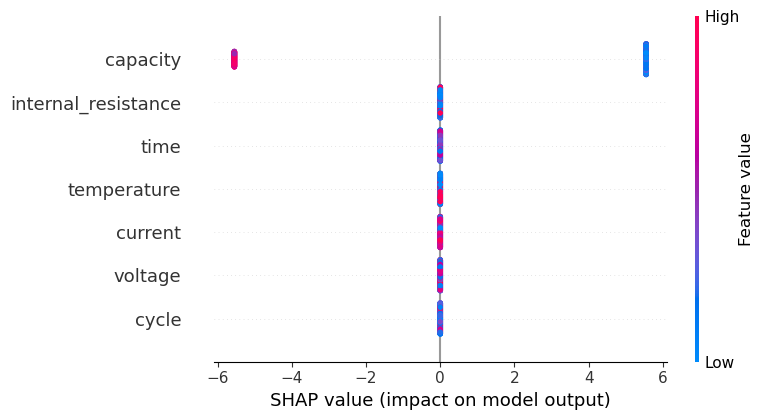

2025-05-08 17:19:08,697 - INFO - 
=== Feature Importance ===
2025-05-08 17:19:08,712 - INFO -                Feature  Importance
4             capacity         1.0
0                cycle         0.0
1              voltage         0.0
2              current         0.0
3          temperature         0.0
5                 time         0.0
6  internal_resistance         0.0
2025-05-08 17:19:08,768 - INFO - Model saved as 'D:/Battery_Failure_Prediction/models\xgboost_model_tuned.joblib'
2025-05-08 17:19:08,779 - INFO - Model saved as 'D:/Battery_Failure_Prediction/models\xgboost_model_tuned.json'
2025-05-08 17:19:08,792 - INFO - Predictions saved as 'D:/Battery_Failure_Prediction/predictions\xgboost_predictions.csv'


In [21]:

# Configure logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Define paths
data_path = 'D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv'
model_dir = 'D:/Battery_Failure_Prediction/models'
predictions_dir = 'D:/Battery_Failure_Prediction/predictions'
model_path = os.path.join(model_dir, 'xgboost_model_tuned.joblib')
json_model_path = os.path.join(model_dir, 'xgboost_model_tuned.json')
predictions_path = os.path.join(predictions_dir, 'xgboost_predictions.csv')

# Create directories if they don't exist
os.makedirs(model_dir, exist_ok=True)
os.makedirs(predictions_dir, exist_ok=True)

# Load the preprocessed dataset
logger.info("Loading the preprocessed dataset...")
df = pd.read_csv(data_path)

# Feature selection based on EDA insights
features = ['cycle', 'voltage', 'current', 'temperature', 'capacity', 'time', 'internal_resistance']
X = df[features]
y = df['failure']

# Define the pipeline with SMOTE and XGBoost
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Set up 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
logger.info("Performing 5-fold cross-validation...")
cv_scores = {}
for metric in scoring.keys():
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring[metric])
    cv_scores[metric] = scores
    logger.info(f"{metric.capitalize()} scores: {scores}")
    logger.info(f"Mean {metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})\n")

# Train the final model on the full dataset
logger.info("Training final model on full dataset...")
pipeline.fit(X, y)

# Make predictions on the full dataset
y_pred = pipeline.predict(X)
y_pred_proba = pipeline.predict_proba(X)[:, 1]

# Evaluate on full dataset
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)

logger.info("\n=== Final Model Evaluation on Full Dataset ===")
logger.info(f"Accuracy: {accuracy:.4f}")
logger.info(f"Precision: {precision:.4f}")
logger.info(f"Recall: {recall:.4f}")
logger.info(f"F1-Score: {f1:.4f}")
logger.info(f"ROC-AUC: {roc_auc:.4f}")

# SHAP analysis
logger.info("Calculating SHAP values...")
explainer = shap.TreeExplainer(pipeline.named_steps['xgb'])
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=features)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': pipeline.named_steps['xgb'].feature_importances_
})
logger.info("\n=== Feature Importance ===")
logger.info(feature_importance.sort_values(by='Importance', ascending=False).to_string())

# Save the model and predictions
joblib.dump(pipeline, model_path)
logger.info(f"Model saved as '{model_path}'")

# Save as JSON (optional, if needed)
pipeline.named_steps['xgb'].save_model(json_model_path)
logger.info(f"Model saved as '{json_model_path}'")

predictions_df = pd.DataFrame({
    'cycle': X['cycle'],
    'battery_id': df['battery_id'],
    'actual_failure': y,
    'predicted_failure': y_pred,
    'failure_probability': y_pred_proba
})
predictions_df.to_csv(predictions_path, index=False)
logger.info(f"Predictions saved as '{predictions_path}'")

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import joblib
import os
import logging
import traceback
import sys

# Define paths
data_path = 'D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv'
model_dir = 'D:/Battery_Failure_Prediction/models'
predictions_dir = 'D:/Battery_Failure_Prediction/predictions'
model_path = os.path.join(model_dir, 'isolation_forest_flipped_model.joblib')
predictions_path = os.path.join(predictions_dir, 'isolation_forest_flipped_predictions.csv')

# Create directories if they don't exist
os.makedirs(model_dir, exist_ok=True)
os.makedirs(predictions_dir, exist_ok=True)

# Load the preprocessed dataset
print("Loading the preprocessed dataset...")
df = pd.read_csv(data_path)

# Feature selection based on EDA insights
features = ['cycle', 'voltage', 'current', 'temperature', 'capacity', 'time', 'internal_resistance']
X = df[features]
y = 1 - df['failure']  # Flip labels: 0 (failure) → 1 (anomaly), 1 (no failure) → 0 (normal)

# Initialize Isolation Forest with contamination set to proportion of non-failures (~0.335)
iso_forest = IsolationForest(contamination=0.335, random_state=42)

# Fit the model
print("Training Isolation Forest with flipped labels...")
iso_forest.fit(X)

# Predict anomalies (-1 for anomaly, 1 for normal)
anomaly_labels = iso_forest.predict(X)
# Convert to 0/1 format: -1 (anomaly, non-failure) → 0 (normal), 1 (normal, failure) → 1 (failure)
# Then invert back to original failure context: 0 (non-failure anomaly) → 1 (failure), 1 (failure normal) → 0 (no failure)
y_pred = np.where(anomaly_labels == -1, 0, 1)
y_pred = 1 - y_pred  # Invert to match original failure definition

# Evaluate the model against original labels
print("\n=== Isolation Forest Evaluation (Flipped) ===")
print(classification_report(df['failure'], y_pred, target_names=['No Failure', 'Failure']))

# Compute anomaly scores (lower scores = more anomalous)
anomaly_scores = -iso_forest.score_samples(X)  # Negative to make higher scores more anomalous

# Save predictions
predictions_df = pd.DataFrame({
    'cycle': df['cycle'],
    'battery_id': df['battery_id'],
    'actual_failure': df['failure'],
    'predicted_failure': y_pred,
    'anomaly_score': anomaly_scores
})
predictions_df.to_csv(predictions_path, index=False)

# Save the model
joblib.dump(iso_forest, model_path)

print(f"\nModel saved as '{model_path}'")
print(f"Predictions saved as '{predictions_path}'")

Loading the preprocessed dataset...
Training Isolation Forest with flipped labels...

=== Isolation Forest Evaluation (Flipped) ===
              precision    recall  f1-score   support

  No Failure       0.24      0.48      0.32       124
     Failure       0.48      0.24      0.32       246

    accuracy                           0.32       370
   macro avg       0.36      0.36      0.32       370
weighted avg       0.40      0.32      0.32       370


Model saved as 'D:/Battery_Failure_Prediction/models\isolation_forest_flipped_model.joblib'
Predictions saved as 'D:/Battery_Failure_Prediction/predictions\isolation_forest_flipped_predictions.csv'


In [26]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib
import os

# Define paths
data_path = 'D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv'
model_dir = 'D:/Battery_Failure_Prediction/models'
predictions_dir = 'D:/Battery_Failure_Prediction/predictions'
model_path = os.path.join(model_dir, 'one_class_svm_model.joblib')
predictions_path = os.path.join(predictions_dir, 'one_class_svm_predictions.csv')

# Create directories if they don't exist
os.makedirs(model_dir, exist_ok=True)
os.makedirs(predictions_dir, exist_ok=True)

# Load the preprocessed dataset
print("Loading the preprocessed dataset...")
df = pd.read_csv(data_path)

# Feature selection based on EDA insights
features = ['cycle', 'voltage', 'current', 'temperature', 'capacity', 'time', 'internal_resistance']
X = df[features]
y = df['failure']

# Split data into normal (non-failure) and test sets
X_normal = X[y == 0]  # Non-failures for training
X_test = X  # Full dataset for evaluation
y_test = y

# Scale the features
scaler = StandardScaler()
X_normal_scaled = scaler.fit_transform(X_normal)
X_test_scaled = scaler.transform(X_test)

# Initialize One-Class SVM
# nu=0.5 allows up to 50% of training data (non-failures) to be outliers; adjust based on results
oc_svm = OneClassSVM(kernel='rbf', nu=0.5, gamma='scale')

# Fit the model on non-failures (normal class)
print("Training One-Class SVM on non-failures...")
oc_svm.fit(X_normal_scaled)

# Predict on the full dataset (-1 for anomaly/failure, 1 for normal/non-failure)
anomaly_labels = oc_svm.predict(X_test_scaled)
# Convert to 0/1 format: -1 (anomaly) → 1 (failure), 1 (normal) → 0 (no failure)
y_pred = np.where(anomaly_labels == -1, 1, 0)

# Evaluate the model
print("\n=== One-Class SVM Evaluation ===")
print(classification_report(y_test, y_pred, target_names=['No Failure', 'Failure']))

# Compute anomaly scores (lower scores = more anomalous)
anomaly_scores = -oc_svm.score_samples(X_test_scaled)  # Negative to make higher scores more anomalous

# Save predictions
predictions_df = pd.DataFrame({
    'cycle': df['cycle'],
    'battery_id': df['battery_id'],
    'actual_failure': y_test,
    'predicted_failure': y_pred,
    'anomaly_score': anomaly_scores
})
predictions_df.to_csv(predictions_path, index=False)

# Save the model and scaler
joblib.dump(oc_svm, model_path)
joblib.dump(scaler, os.path.join(model_dir, 'scaler.joblib'))

print(f"\nModel saved as '{model_path}'")
print(f"Scaler saved as '{os.path.join(model_dir, 'scaler.joblib')}'")
print(f"Predictions saved as '{predictions_path}'")

Loading the preprocessed dataset...
Training One-Class SVM on non-failures...

=== One-Class SVM Evaluation ===
              precision    recall  f1-score   support

  No Failure       1.00      0.48      0.65       124
     Failure       0.79      1.00      0.88       246

    accuracy                           0.83       370
   macro avg       0.90      0.74      0.77       370
weighted avg       0.86      0.83      0.81       370


Model saved as 'D:/Battery_Failure_Prediction/models\one_class_svm_model.joblib'
Scaler saved as 'D:/Battery_Failure_Prediction/models\scaler.joblib'
Predictions saved as 'D:/Battery_Failure_Prediction/predictions\one_class_svm_predictions.csv'


In [27]:
import asyncio
import platform
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import pandas as pd

# Define main coroutine
async def main():
    # Load and preprocess data
    print("Loading the preprocessed dataset...")
    df = pd.read_csv('D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv')
    features = ['cycle', 'voltage', 'current', 'temperature', 'capacity', 'time', 'internal_resistance']
    
    X = df[features].values
    y = df['failure'].values

    # Normalize features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Create sequences for LSTM
    sequence_length = 20
    X_seq, y_seq = [], []
    for i in range(len(X_scaled) - sequence_length):
        X_seq.append(X_scaled[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    X_seq, y_seq = np.array(X_seq), np.array(y_seq)

    # Ensure both classes are in the dataset
    if len(np.unique(y_seq)) < 2:
        raise ValueError("Dataset contains only one class. Check the data.")

    # Stratified train-test split
    print("Splitting data with stratification...")
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42)

    # Print class distribution
    print("Training set class distribution:", np.bincount(y_train))
    print("Test set class distribution:", np.bincount(y_test))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(100, input_shape=(sequence_length, len(features)), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(100))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Compute class weights
    n_no_failure = np.sum(y_train == 0)
    n_failure = np.sum(y_train == 1)
    class_weight = {0: (1 / n_no_failure) * (len(y_train) / 2.0), 1: (1 / n_failure) * (len(y_train) / 2.0) * 1.5}
    print("Class weights:", class_weight)

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train model
    print("Training LSTM...")
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, class_weight=class_weight, callbacks=[early_stopping], verbose=1)

    # Predict with adjustable threshold
    print("Predicting...")
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.2).astype(int).flatten()

    # Check unique predictions
    unique_preds = np.unique(y_pred)
    if len(unique_preds) < 2:
        print(f"Warning: Predictions contain only one class ({unique_preds}). Adjusting threshold to 0.1...")
        y_pred = (model.predict(X_test) > 0.1).astype(int).flatten()

    # Evaluate
    print("\n=== LSTM Evaluation ===")
    print(classification_report(y_test, y_pred, target_names=['No Failure', 'Failure'], labels=[0, 1]))

    # Save predictions
    test_indices = range(len(X) - len(y_test) - sequence_length, len(X) - sequence_length)
    predictions_df = pd.DataFrame({
        'cycle': df['cycle'].iloc[test_indices],
        'battery_id': df['battery_id'].iloc[test_indices],
        'actual_failure': y_test,
        'predicted_failure': y_pred,
        'prediction_prob': y_pred_prob.flatten()
    })
    predictions_df.to_csv('D:/Battery_Failure_Prediction/predictions/lstm_predictions.csv', index=False)

    # Save the model
    model.save('D:/Battery_Failure_Prediction/models/lstm_model.h5')

    print("Predictions saved as 'D:/Battery_Failure_Prediction/predictions/lstm_predictions.csv'")
    print("Model saved as 'D:/Battery_Failure_Prediction/models/lstm_model.h5'")

# Check if running in an interactive environment or standard Python
if platform.system() == "Emscripten":
    asyncio.ensure_future(main())
else:
    try:
        if __name__ == "__main__":
            asyncio.run(main())
    except RuntimeError as e:
        if "cannot be called from a running event loop" in str(e):
            loop = asyncio.get_event_loop()
            if loop.is_running():
                await main()
            else:
                loop.run_until_complete(main())
        else:
            raise e

Loading the preprocessed dataset...
Splitting data with stratification...
Training set class distribution: [ 83 197]
Test set class distribution: [21 49]
Class weights: {0: 1.6867469879518073, 1: 1.065989847715736}
Training LSTM...
Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.7484 - loss: 0.7129 - val_accuracy: 0.9286 - val_loss: 0.1234
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9812 - loss: 0.1096 - val_accuracy: 0.9643 - val_loss: 0.0895
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9761 - loss: 0.0999 - val_accuracy: 0.8929 - val_loss: 0.1851
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9855 - loss: 0.0481 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9915 - loss: 0.0320 - val_accuracy: 1.0000 - val_loss: 0.0299
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9963 - loss: 0.0143 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch

2025-05-08 17:25:45,830 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 



=== LSTM Evaluation ===
              precision    recall  f1-score   support

  No Failure       1.00      0.90      0.95        21
     Failure       0.96      1.00      0.98        49

    accuracy                           0.97        70
   macro avg       0.98      0.95      0.96        70
weighted avg       0.97      0.97      0.97        70



2025-05-08 17:25:45,915 - DEBUG - Creating converter from 5 to 3


Predictions saved as 'D:/Battery_Failure_Prediction/predictions/lstm_predictions.csv'
Model saved as 'D:/Battery_Failure_Prediction/models/lstm_model.h5'


In [28]:


# Load preprocessed data
df = pd.read_csv('D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv')
original_features = ['cycle', 'voltage', 'current', 'temperature', 'capacity', 'time', 'internal_resistance']
X = df[original_features].values
y = df['failure'].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences for LSTM
sequence_length = 20
X_seq, y_seq = [], []
for i in range(len(X_scaled) - sequence_length):
    X_seq.append(X_scaled[i:i + sequence_length])
    y_seq.append(y[i + sequence_length])
X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# Split data
train_size = int(len(X_seq) * 0.8)
X_train_seq, X_test_seq = X_seq[:train_size], X_seq[train_size:]
y_train_seq, y_test_seq = y_seq[:train_size], y_seq[train_size:]

# Load pre-trained models
xgb = joblib.load('D:/Battery_Failure_Prediction/models/xgboost_model.joblib')
oc_svm = joblib.load('D:/Battery_Failure_Prediction/models/one_class_svm_model.joblib')
lstm = load_model('D:/Battery_Failure_Prediction/models/lstm_model.h5')

# Prepare predictions
# XGBoost predictions with probability estimates
xgb_pred_prob = xgb.predict_proba(X_scaled)[:, 1]  # Probability of class 1 (Failure)
xgb_pred = (xgb_pred_prob > 0.5).astype(int)

# One-Class SVM predictions (binary, scaled to 0-1)
oc_svm_pred = oc_svm.predict(X_scaled)
oc_svm_pred = np.where(oc_svm_pred == -1, 1, 0)  # -1 (outlier) as 1, 1 (inlier) as 0
oc_svm_pred_prob = np.where(oc_svm_pred == 1, 0.9, 0.1)  # Arbitrary confidence scaling

# LSTM predictions with probabilities
lstm_pred_prob = lstm.predict(X_test_seq).flatten()
lstm_pred = (lstm_pred_prob > 0.2).astype(int)

# Align predictions to test set
xgb_test_prob = xgb_pred_prob[train_size + sequence_length:]
oc_svm_test_prob = oc_svm_pred_prob[train_size + sequence_length:]
ensemble_prob = (0.5 * lstm_pred_prob + 0.3 * xgb_test_prob + 0.2 * oc_svm_test_prob)
ensemble_pred = (ensemble_prob > 0.5).astype(int)

# Evaluate
print("\n=== Ensemble Evaluation ===")
print(classification_report(y_test_seq, ensemble_pred, target_names=['No Failure', 'Failure'], labels=[0, 1]))

# Save predictions
test_start = len(X) - len(y_test_seq) - sequence_length
test_indices = range(test_start, test_start + len(ensemble_pred))
predictions_df = pd.DataFrame({
    'cycle': df['cycle'].iloc[test_indices],
    'battery_id': df['battery_id'].iloc[test_indices],
    'actual_failure': y_test_seq,
    'predicted_failure': ensemble_pred,
    'ensemble_prob': ensemble_prob
})
predictions_df.to_csv('D:/Battery_Failure_Prediction/predictions/ensemble_predictions.csv', index=False)
print("Predictions saved as 'D:/Battery_Failure_Prediction/predictions/ensemble_predictions.csv'")

2025-05-08 17:25:49,932 - DEBUG - Creating converter from 3 to 5
2025-05-08 17:25:50,080 - WARNING - Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step

=== Ensemble Evaluation ===
              precision    recall  f1-score   support

  No Failure       0.00      0.00      0.00         0
     Failure       1.00      1.00      1.00        70

    accuracy                           1.00        70
   macro avg       0.50      0.50      0.50        70
weighted avg       1.00      1.00      1.00        70

Predictions saved as 'D:/Battery_Failure_Prediction/predictions/ensemble_predictions.csv'


In [29]:


# Load preprocessed data
df = pd.read_csv('D:/Battery_Failure_Prediction/nasa_battery_data_preprocessed.csv')
features = ['cycle', 'voltage', 'current', 'temperature', 'capacity', 'time', 'internal_resistance']
X = df[features].values
y = df['failure'].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data for XGBoost and One-Class SVM
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 1. XGBoost Hyperparameter Tuning
print("Tuning XGBoost...")
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='f1', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_grid.best_params_)
xgb_best = xgb_grid.best_estimator_
joblib.dump(xgb_best, 'D:/Battery_Failure_Prediction/models/xgboost_model_tuned.joblib')

# Evaluate XGBoost
y_pred_xgb = xgb_best.predict(X_test)
print("\n=== XGBoost Evaluation ===")
print(classification_report(y_test, y_pred_xgb, target_names=['No Failure', 'Failure'], labels=[0, 1]))

# 2. One-Class SVM Hyperparameter Tuning
print("\nTuning One-Class SVM...")
X_normal_train = X_train[y_train == 0]
oc_svm_param_grid = {
    'nu': [0.05, 0.1, 0.2],
    'gamma': ['scale', 'auto', 0.1]
}
oc_svm = OneClassSVM(kernel='rbf')
oc_svm_grid = GridSearchCV(oc_svm, oc_svm_param_grid, cv=5, scoring='f1', n_jobs=-1)
oc_svm_grid.fit(X_normal_train)
print("Best One-Class SVM Parameters:", oc_svm_grid.best_params_)
oc_svm_best = oc_svm_grid.best_estimator_
joblib.dump(oc_svm_best, 'D:/Battery_Failure_Prediction/models/one_class_svm_model_tuned.joblib')

# Evaluate One-Class SVM
y_pred_oc_svm = oc_svm_best.predict(X_test)
y_pred_oc_svm = np.where(y_pred_oc_svm == -1, 1, 0)
print("\n=== One-Class SVM Evaluation ===")
print(classification_report(y_test, y_pred_oc_svm, target_names=['No Failure', 'Failure'], labels=[0, 1]))

# 3. LSTM Manual Tuning
print("\nTuning LSTM...")
sequence_length_options = [10, 20]
lstm_units_options = [50, 100]
best_f1 = 0
best_params = {}

for sequence_length in sequence_length_options:
    for units in lstm_units_options:
        print(f"\nTrying sequence_length={sequence_length}, units={units}")
        # Create sequences
        X_seq, y_seq = [], []
        for i in range(len(X_scaled) - sequence_length):
            X_seq.append(X_scaled[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        X_seq, y_seq = np.array(X_seq), np.array(y_seq)

        # Split data
        X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42)

        # Build LSTM model
        model = Sequential()
        model.add(LSTM(units, input_shape=(sequence_length, len(features)), return_sequences=True))
        model.add(Dropout(0.3))
        model.add(LSTM(units))
        model.add(Dropout(0.3))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Class weights
        n_no_failure = np.sum(y_train_seq == 0)
        n_failure = np.sum(y_train_seq == 1)
        class_weight = {0: (1 / n_no_failure) * (len(y_train_seq) / 2.0), 1: (1 / n_failure) * (len(y_train_seq) / 2.0) * 1.5}

        # Early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=16, validation_split=0.1, class_weight=class_weight, callbacks=[early_stopping], verbose=0)

        # Evaluate
        y_pred_prob = model.predict(X_test_seq).flatten()
        y_pred = (y_pred_prob > 0.2).astype(int)
        report = classification_report(y_test_seq, y_pred, target_names=['No Failure', 'Failure'], labels=[0, 1], output_dict=True)
        f1_failure = report['Failure']['f1-score']
        print(f"F1-Score for Failure: {f1_failure}")

        if f1_failure > best_f1:
            best_f1 = f1_failure
            best_params = {'sequence_length': sequence_length, 'units': units}
            model.save('D:/Battery_Failure_Prediction/models/lstm_model_tuned.h5')

print("\nBest LSTM Parameters:", best_params)
print("Tuned LSTM model saved as 'D:/Battery_Failure_Prediction/models/lstm_model_tuned.h5'")

Tuning XGBoost...
Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

=== XGBoost Evaluation ===
              precision    recall  f1-score   support

  No Failure       1.00      0.96      0.98        25
     Failure       0.98      1.00      0.99        49

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74


Tuning One-Class SVM...
Best One-Class SVM Parameters: {'gamma': 'scale', 'nu': 0.05}

=== One-Class SVM Evaluation ===
              precision    recall  f1-score   support

  No Failure       1.00      0.88      0.94        25
     Failure       0.94      1.00      0.97        49

    accuracy                           0.96        74
   macro avg       0.97      0.94      0.95        74
weighted avg       0.96      0.96      0.96        74


Tuning LSTM...

Trying sequence_length=10, units=50


2025-05-08 17:26:18,132 - WARNING - 5 out of the last 7 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002B67FED2020> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step

2025-05-08 17:26:18,791 - WARNING - 6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002B67FED2020> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step


2025-05-08 17:26:20,155 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


F1-Score for Failure: 0.9791666666666666

Trying sequence_length=10, units=100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step
F1-Score for Failure: 0.9791666666666666

Trying sequence_length=20, units=50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step


2025-05-08 17:27:01,563 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


F1-Score for Failure: 0.98989898989899

Trying sequence_length=20, units=100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 580ms/step
F1-Score for Failure: 0.98

Best LSTM Parameters: {'sequence_length': 20, 'units': 50}
Tuned LSTM model saved as 'D:/Battery_Failure_Prediction/models/lstm_model_tuned.h5'


In [1]:
# Define paths
predictions_dir = 'D:/Battery_Failure_Prediction/predictions'
combined_path = os.path.join(predictions_dir, 'combined_predictions.csv')

# Load all prediction files
rf_df = pd.read_csv(os.path.join(predictions_dir, 'rf_predictions_tuned.csv'))
xgb_df = pd.read_csv(os.path.join(predictions_dir, 'xgboost_predictions.csv'))
iso_df = pd.read_csv(os.path.join(predictions_dir, 'isolation_forest_flipped_predictions.csv'))
lstm_df = pd.read_csv(os.path.join(predictions_dir, 'lstm_predictions.csv'))
ensemble_df = pd.read_csv(os.path.join(predictions_dir, 'ensemble_predictions.csv'))

# Merge on common columns: cycle, battery_id, actual_failure
combined_df = rf_df[['cycle', 'battery_id', 'actual_failure']].copy()
combined_df['rf_predicted_failure'] = rf_df['predicted_failure']
combined_df['rf_failure_probability'] = rf_df['failure_probability']
combined_df['xgb_predicted_failure'] = xgb_df['predicted_failure']
combined_df['xgb_failure_probability'] = xgb_df['failure_probability']
combined_df['iso_predicted_failure'] = iso_df['predicted_failure']
combined_df['iso_anomaly_score'] = iso_df['anomaly_score']
combined_df['lstm_predicted_failure'] = lstm_df['predicted_failure']
combined_df['lstm_prediction_prob'] = lstm_df['prediction_prob']
combined_df['ensemble_predicted_failure'] = ensemble_df['predicted_failure']
combined_df['ensemble_prob'] = ensemble_df['ensemble_prob']

# Save combined predictions
combined_df.to_csv(combined_path, index=False)
print(f"Combined predictions saved as '{combined_path}'")

Combined predictions saved as 'D:/Battery_Failure_Prediction/predictions\combined_predictions.csv'
